September 6, 2020
1. app data need to be divided into major sectors
    This is because after reading literature, you find different sectors follow different patterns and no previous paper write
    an entire paper on all-encompassing internet economy.

You could consider bringing in other data.

In [1]:
# import packages and define path
from pathlib import Path
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from google_play_scraper import app
from tqdm import tqdm
input_path = Path("/home/naixin/Insync/naixin88@sina.cn/OneDrive/_____GWU_ECON_PHD_____/___Dissertation___/____WEB_SCRAPER____")
output_path = Path("/home/naixin/Insync/naixin88@sina.cn/OneDrive/_____GWU_ECON_PHD_____/___Dissertation___/____WEB_SCRAPER____/___cleaned_datasets___")
# run python scripts containing all the functions
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'

In [4]:
# open an old dataset for tracking
q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / "202009" / "TRACKING_202002.pickle"
with open(q, 'rb') as filename:
    C = pickle.load(filename)

# get the unique id list from the old data
id_list = get_id_from_data_beofre_202009(C)
print(id_list)

TypeError: string indices must be integers

In [17]:
# scraping app details according to id
app_details = scraping_apps_according_to_id(id_list)
q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / "202009" / "TRACKING_202002.pickle"
pickle.dump(app_details, open(q,'wb'))

scraping...: 100%|██████████| 6860/6860 [3:05:01<00:00,  1.62s/it]      


In [5]:
# load all the data scraped before 202009 and convert them to dictionaries with appid as keys
# and save them into __PANELS__ folder (subfolders are named according to the initial month the panel is scraped)
# the original scraped data are stored in "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" (subfolders are named according to the month
# the data is scraped).
### First convert all the initial panels into appid as key and as dataframe
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'

for i in ["201812", '201907', '201908', '201912', '202001', '202002']:
    filename = 'ALL_APP_DETAILS_' + i + '.pickle'
    q = input_path / "NEW_ALGORITHM_MONTHLY_SCRAPE" / i / filename
    with open(q, 'rb') as f:
        C = pickle.load(f)
    D = convert_list_data_to_dict_with_appid_keys(C)
    E = transform_old_scraper_dict_dataframe(D, i)

    filename = 'INITIAL_' + i + '.pickle'
    folder_name = i + '_PANEL_DF'
    q = input_path / "__PANELS__" / folder_name / filename
    pickle.dump(E, open(q,'wb'))

2_functions_data_visualization.py:152: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  E[['IAP_low', 'IAP_high']] = E['inAppProductPrice'].apply(lambda x: pd.Series(x))
2_functions_data_visualization.py:152: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  E[['IAP_low', 'IAP_high']] = E['inAppProductPrice'].apply(lambda x: pd.Series(x))
2_functions_data_visualization.py:152: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  E[['IAP_low', 'IAP_high']] = E['inAppProductPrice'].apply(lambda x: pd.Series(x))
2_functions_data_visualization.py:152: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' i

In [6]:
### second convert all the tracking datasets before 202009 into dataframe
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'

# key represents initial panel, value represents panels tracking the initial panel
panels_track = {
'201812':['201912', '202001', '202003', '202004', '202009'],
'201907':['201908', '201909', '201912', '202001', '202003', '202004', '202009'],
'201908':['201912', '202001', '202003', '202004', '202009'],
'201912':['202001', '202003', '202004', '202009'],
'202001':['202003', '202004', '202009'],
'202002':['202004', '202009']}

for i, months in panels_track.items():
    for j in months:
        # because since 202003 I started using the new scraper
        if j not in ['202003', '202004', '202009']:
            filename = 'TRACKING_' + i + '.pickle'
            q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / j / filename
            with open(q, 'rb') as f:
                C = pickle.load(f)
            D = convert_list_data_to_dict_with_appid_keys(C)
            E = transform_old_scraper_dict_dataframe(D, j)
            filename = j + '_PANEL' + '.pickle'
            folder_name = i + '_PANEL_DF'
            q = input_path / "__PANELS__" / folder_name / filename
            pickle.dump(E, open(q,'wb'))
        elif j in ['202003', '202004']:
            filename = 'TRACKING_' + i + '.pickle'
            q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / j / filename
            with open(q, 'rb') as f:
                C = pickle.load(f)
            D = convert_list_data_to_dict_with_appid_keys(C)
            E = transform_dict_dataframe(D, j)
            filename = j + '_PANEL' + '.pickle'
            folder_name = i + '_PANEL_DF'
            q = input_path / "__PANELS__" / folder_name / filename
            pickle.dump(E, open(q,'wb'))
        # because since 202009 I started using appid as key in scraping stage, so I do not need to convert from list to dictionary first
        elif j in ['202009']:
            filename = 'TRACKING_' + i + '.pickle'
            q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / j / filename
            with open(q, 'rb') as f:
                C = pickle.load(f)
            E = transform_dict_dataframe(D, j)
            filename = j + '_PANEL' + '.pickle'
            folder_name = i + '_PANEL_DF'
            q = input_path / "__PANELS__" / folder_name / filename
            pickle.dump(E, open(q,'wb'))

2_functions_data_visualization.py:152: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  E[['IAP_low', 'IAP_high']] = E['inAppProductPrice'].apply(lambda x: pd.Series(x))
2_functions_data_visualization.py:152: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  E[['IAP_low', 'IAP_high']] = E['inAppProductPrice'].apply(lambda x: pd.Series(x))
2_functions_data_visualization.py:152: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  E[['IAP_low', 'IAP_high']] = E['inAppProductPrice'].apply(lambda x: pd.Series(x))
2_functions_data_visualization.py:152: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' i

after dropping rows all NA in all columns, the non-missing values in each column  title_202003                            4809
description_202003                      4809
summary_202003                          4809
installs_202003                         4809
minInstalls_202003                      4809
score_202003                            4797
ratings_202003                          4797
reviews_202003                          4797
histogram_202003                        4350
price_202003                            4809
currency_202003                         4809
size_202003                             4809
androidVersion_202003                   4805
androidVersionText_202003               4809
developer_202003                        4809
developerId_202003                      4809
developerEmail_202003                   4809
developerWebsite_202003                 4010
developerAddress_202003                 3026
privacyPolicy_202003                    4227
developerInternalI

In [64]:
### TEST CELL 1.1
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'
q = input_path / "NEW_ALGORITHM_MONTHLY_SCRAPE" / "201812" / "ALL_APP_DETAILS_201812.pickle"
with open(q, 'rb') as filename:
    B = pickle.load(filename)

C = convert_list_data_to_dict_with_appid_keys(B)
D = transform_old_scraper_dict_dataframe(C, 'INITIAL_201812')
#D.check_all_genre_covered.unique()
#F = D[D.check_all_genre_covered == 2]
#D.check_all_genre_covered_202001_track_201812.unique()
#F.count()

In [24]:
### TEST CELL 1.2
for col in D.columns:
    print(col)
#D.check_all_genre_covered_INITIAL_201812.unique()
#print(D.genreId_INITIAL_201812.unique())
#EE = D.inAppProductPrice_INITIAL_202002
#print(EE)
print(D.inAppProductPrice_INITIAL_201812.unique())
#print(D.UTILITIES_INITIAL_201812.unique())
#print(D.SOCIAL_MEDIA_LEISURE_INITIAL_201812.unique())
#print(D.check_all_genre_covered_INITIAL_201812.unique())
#EE = D['genreId_INITIAL_201812'][D.check_all_genre_covered_INITIAL_201812 == 2]

appId_INITIAL_201812
genreId_INITIAL_201812
contentRating_INITIAL_201812
version_INITIAL_201812
description_INITIAL_201812
developer_INITIAL_201812
developerAddress_INITIAL_201812
developerEmail_INITIAL_201812
developerId_INITIAL_201812
developerWebsite_INITIAL_201812
histogram_INITIAL_201812
inAppProductPrice_INITIAL_201812
icon_INITIAL_201812
installs_INITIAL_201812
price_INITIAL_201812
androidVersion_INITIAL_201812
reviews_INITIAL_201812
score_INITIAL_201812
screenshots_INITIAL_201812
size_INITIAL_201812
title_INITIAL_201812
updated_INITIAL_201812
url_INITIAL_201812
video_INITIAL_201812
free_False_INITIAL_201812
free_True_INITIAL_201812
offersIAP_False_INITIAL_201812
offersIAP_True_INITIAL_201812
minInstalls_INITIAL_201812
GAME_INITIAL_201812
UTILITIES_INITIAL_201812
SOCIAL_MEDIA_LEISURE_INITIAL_201812
check_all_genre_covered_INITIAL_201812
contentRating_18+_INITIAL_201812
contentRating_17+_INITIAL_201812
contentRating_10+_INITIAL_201812
contentRating_everyone_INITIAL_201812
content

In [5]:
### TEST CELL 2.1
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'
q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / "201909" / "TRACKING_201907.pickle"
with open(q, 'rb') as filename:
    B = pickle.load(filename)

C = convert_list_data_to_dict_with_appid_keys(B)
D = transform_old_scraper_dict_dataframe(C, '201909_T_201907')
#D.check_all_genre_covered.unique()
#F = D[D.check_all_genre_covered == 2]
#D.check_all_genre_covered_202001_track_201812.unique()
#F.count()


2_functions_data_visualization.py:152: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  E[['IAP_low', 'IAP_high']] = E['inAppProductPrice'].apply(lambda x: pd.Series(x))


In [3]:
### TEST CELL 2.2
for col in D.columns:
    print(col)
#D.check_all_genre_covered_INITIAL_201812.unique()
#print(D.genreId_INITIAL_201812.unique())
#EE = D.inAppProductPrice_INITIAL_202002
#print(EE)
print(D.price_202003_T_201812.unique())
#print(D.UTILITIES_INITIAL_201812.unique())
#print(D.SOCIAL_MEDIA_LEISURE_INITIAL_201812.unique())
#print(D.check_all_genre_covered_INITIAL_201812.unique())
#EE = D['genreId_INITIAL_201812'][D.check_all_genre_covered_INITIAL_201812 == 2]

title_202003_T_201812
description_202003_T_201812
summary_202003_T_201812
installs_202003_T_201812
minInstalls_202003_T_201812
score_202003_T_201812
ratings_202003_T_201812
reviews_202003_T_201812
histogram_202003_T_201812
price_202003_T_201812
currency_202003_T_201812
size_202003_T_201812
androidVersion_202003_T_201812
androidVersionText_202003_T_201812
developer_202003_T_201812
developerId_202003_T_201812
developerEmail_202003_T_201812
developerWebsite_202003_T_201812
developerAddress_202003_T_201812
privacyPolicy_202003_T_201812
developerInternalID_202003_T_201812
genre_202003_T_201812
genreId_202003_T_201812
icon_202003_T_201812
headerImage_202003_T_201812
screenshots_202003_T_201812
video_202003_T_201812
videoImage_202003_T_201812
released_202003_T_201812
updated_202003_T_201812
version_202003_T_201812
recentChangesHTML_202003_T_201812
comments_202003_T_201812
appId_202003_T_201812
url_202003_T_201812
released_datetime_202003_T_201812
today_datetime_202003_T_201812
days_since_rele

In [3]:
# TEST CELL 3.1 merge
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'

# merge all panels into a single dataframe
panels = ['201908', '201909', '201912', '202001', '202003', '202004', '202009']
final_panel = merge_dataframes_panels('201907', panels)



In [3]:
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'
panels_track = {
'201812':['201912', '202001', '202003', '202004', '202009'],
'201907':['201908', '201909', '201912', '202001', '202003', '202004', '202009'],
'201908':['201912', '202001', '202003', '202004', '202009'],
'201912':['202001', '202003', '202004', '202009'],
'202001':['202003', '202004', '202009'],
'202002':['202004', '202009']}

for k, v in panels_track.items():
    final_panel = merge_dataframes_panels(k, v)

    filename = k + '_MERGED' + '.pickle'
    folder_name = k + '_PANEL_DF'
    q = input_path / "__PANELS__" / folder_name / filename
    pickle.dump(final_panel, open(q,'wb'))



In [17]:
# TEST CELL 4.1 graph trends across time
#%run -i '1_functions_scraping_data.py'
#%run -i '2_functions_data_visualization.py'

q = input_path / "__PANELS__" / "201908_PANEL_DF" / "201908_MERGED.pickle"
with open(q, 'rb') as filename:
    B = pickle.load(filename)
initial_date = '201908'
panels = ['201912', '202001', '202003', '202004', '202009']
panels.insert(0, initial_date)
print(panels)
var_names = 'score' + '_'
col_names = list(map(lambda x: var_names + str(x), panels))
print(col_names)
#C = B.sample(n=20)
# C = B
# C = C[score_cols]
# C.loc[:, 'increase_over_interval'] = C['minInstalls_202009'] - C['minInstalls_201908']
# C = C.sort_values(by='increase_over_interval', ascending=False)
# top_performers = C.loc[C['increase_over_interval'] > 1000000000]
# top_performers = top_performers.index.tolist()

['201908', '201912', '202001', '202003', '202004', '202009']
['score_201908', 'score_201912', 'score_202001', 'score_202003', 'score_202004', 'score_202009']


<Figure size 460.8x316.8 with 0 Axes>

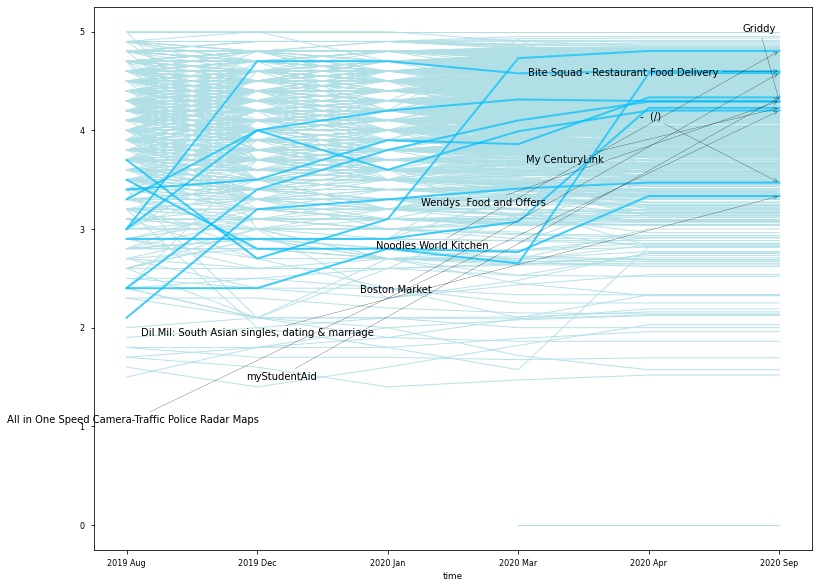

In [31]:
# TEST CELL 4.2 Try the functions
%run -i '2_functions_data_visualization.py'
panels = ['201912', '202001', '202003', '202004', '202009']
C, top_performers = dataframe_for_line_plot(initial_date = '201908',
                                      panels = panels,
                                      variable='score',
                                      sample = 1000)
graph_line_plots(C,
                 initial_date='201908',
                 panels = panels,
                 variable='score',
                 top_performers = top_performers)

In [ ]:
C['com.cox.android.mobileconnect']

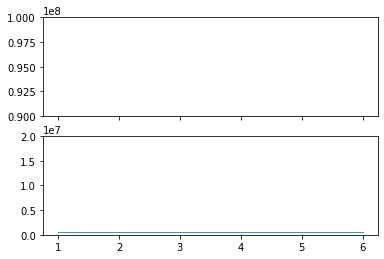

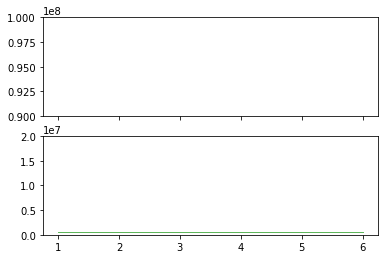

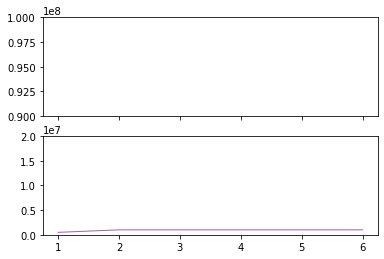

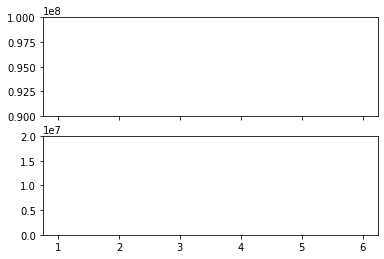

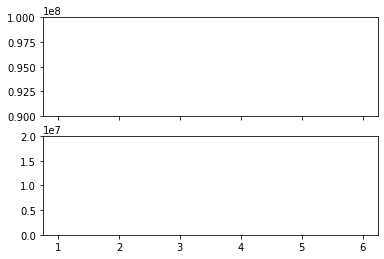

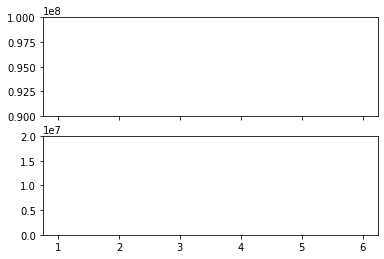

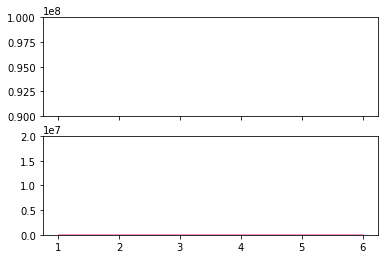

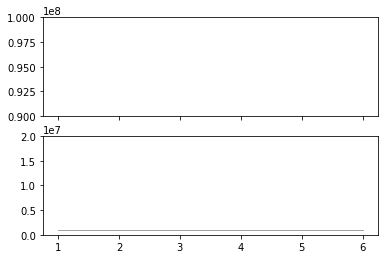

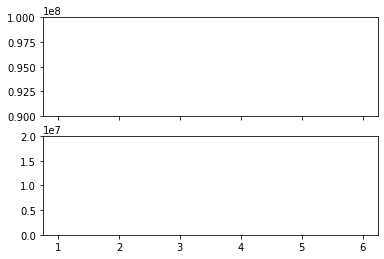

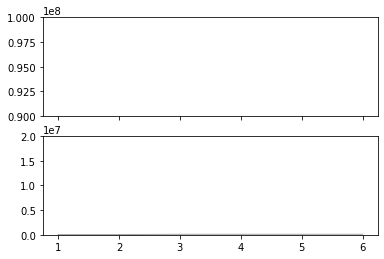

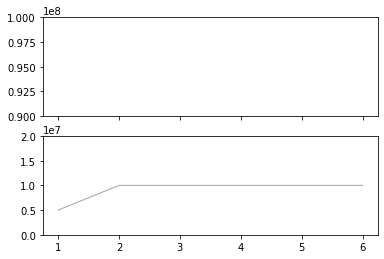

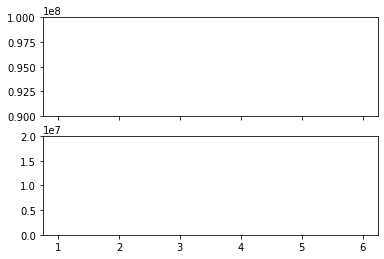

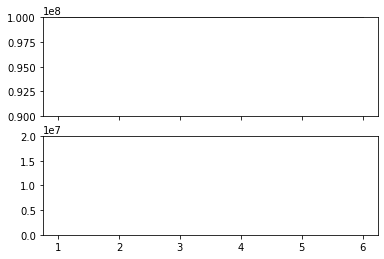

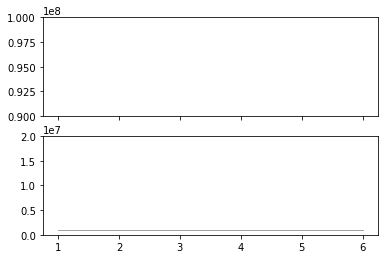

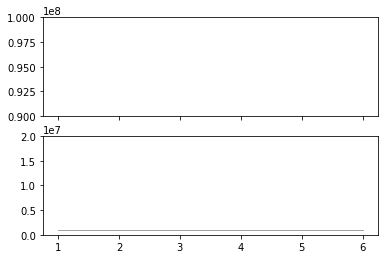

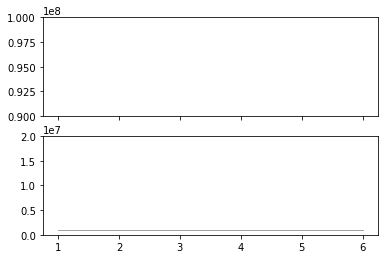

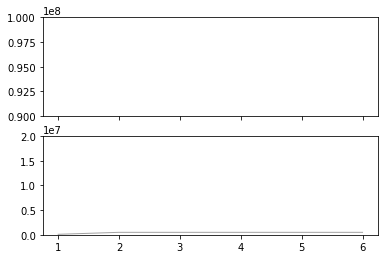

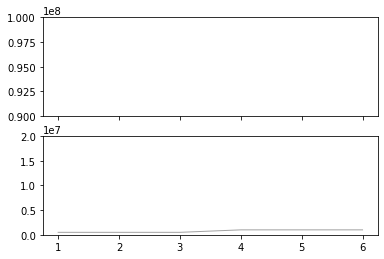

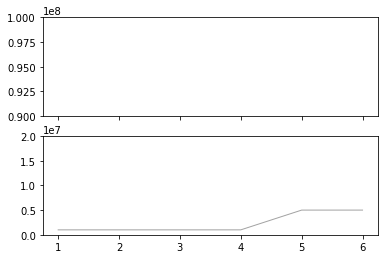

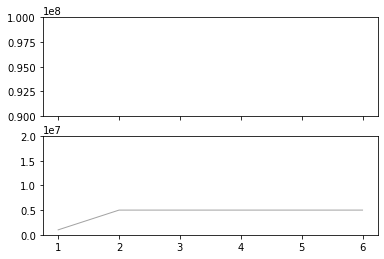

In [3]:
# TEST CELL 4.3 Broken Axis
# I decide against using broken axis, because some apps' minInstalls do
# appear in the middle
num=0
for column in C.drop('x', axis=1):
    num+=1
    f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
    ax.plot(C['x'], C[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
    ax2.plot(C['x'], C[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
    ax.set_ylim(90000000, 100000000)  # outliers only
    ax2.set_ylim(0, 20000000)  # most of the data

2_functions_data_visualization.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C['increase_over_interval'] = C[end_date_var] - C[initial_date_var]
2_functions_data_visualization.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C['increase_over_interval'] = C[end_date_var] - C[initial_date_var]
2_functions_data_visualization.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

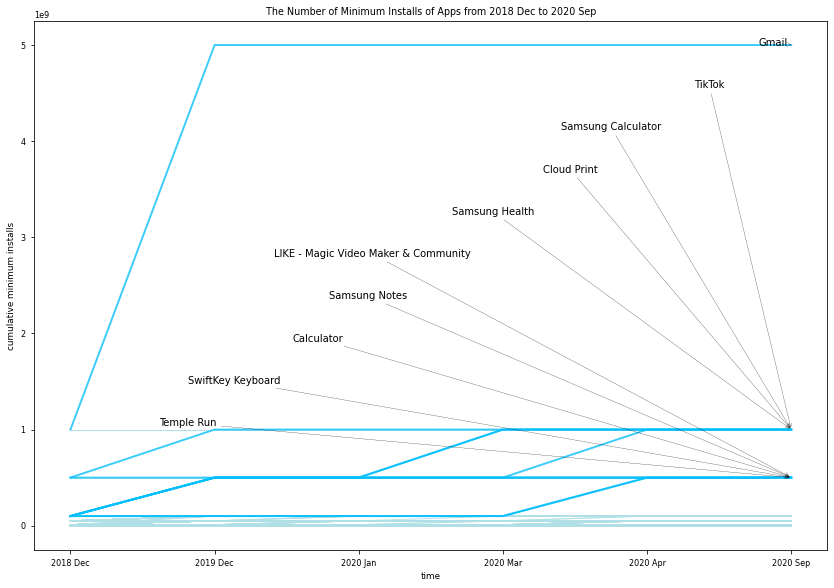

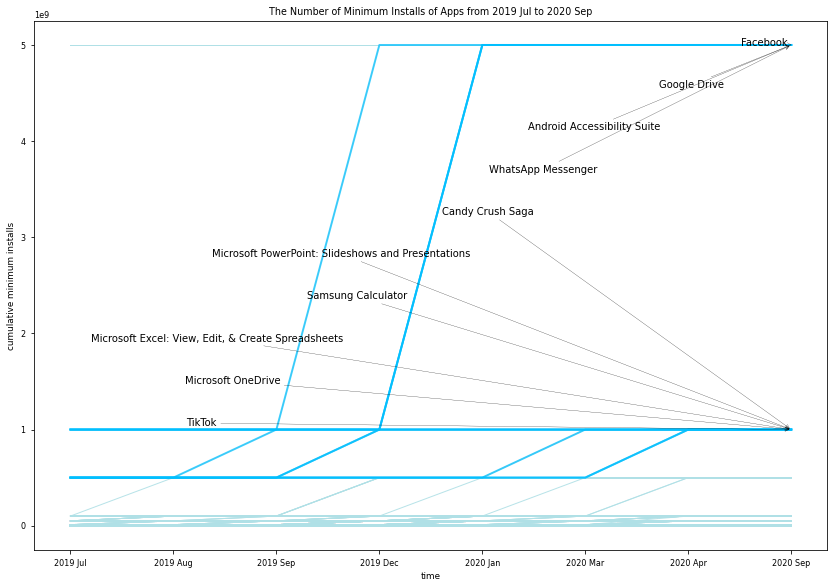

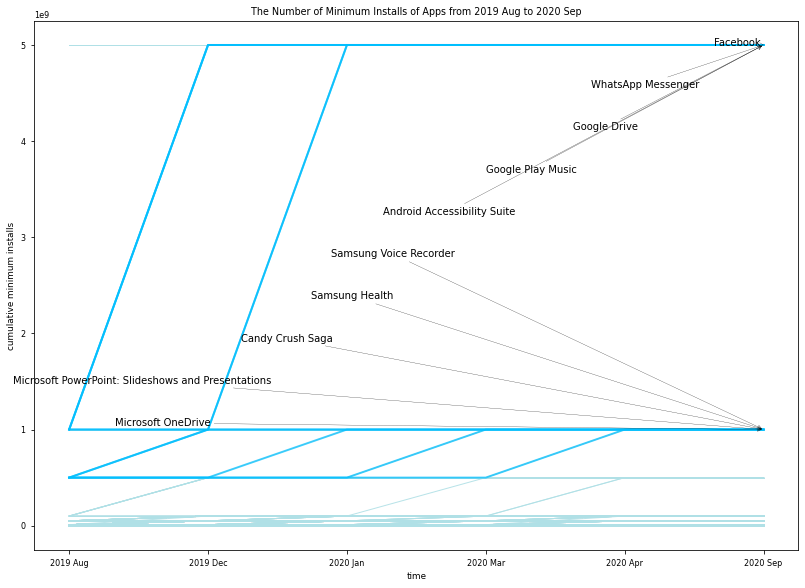

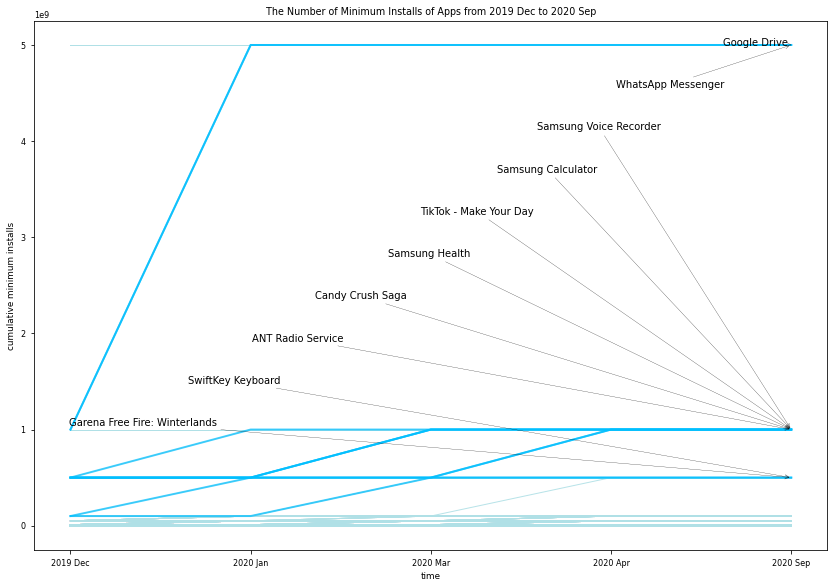

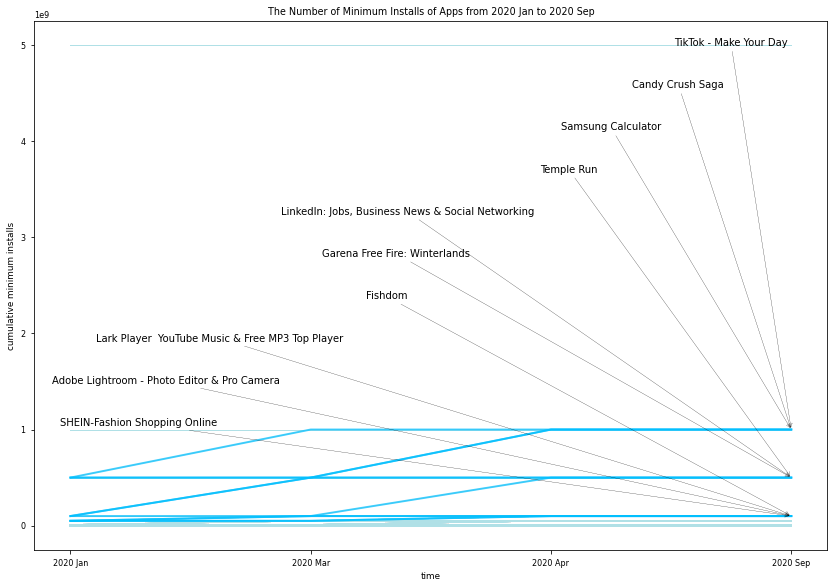

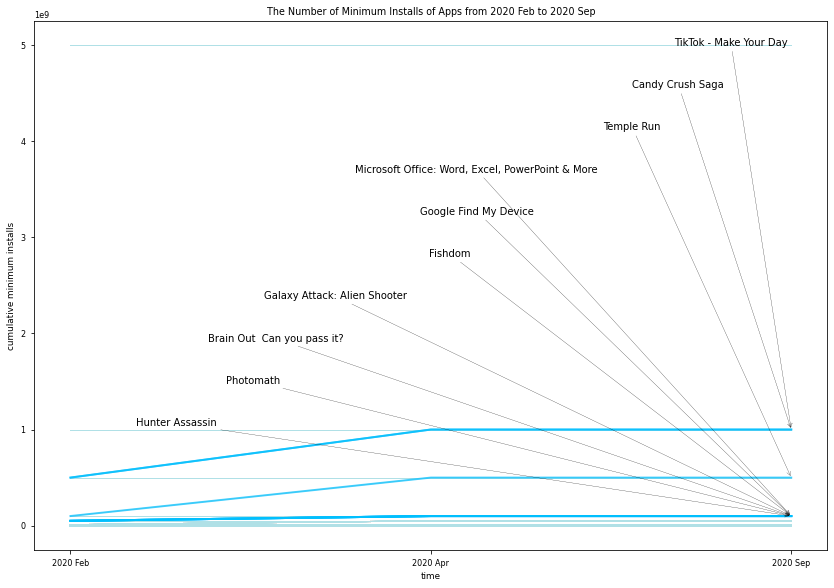

In [7]:
%run -i '2_functions_data_visualization.py'
panels_track = {
'201812':['201912', '202001', '202003', '202004', '202009'],
'201907':['201908', '201909', '201912', '202001', '202003', '202004', '202009'],
'201908':['201912', '202001', '202003', '202004', '202009'],
'201912':['202001', '202003', '202004', '202009'],
'202001':['202003', '202004', '202009'],
'202002':['202004', '202009']}
for initial_date, panels in panels_track.items():
    C, top_performers = dataframe_for_line_plot(initial_date = initial_date,
                                                      panels = panels,
                                                      variable = 'minInstalls')
    graph_line_plots(C,
                     initial_date = initial_date,
                     panels = panels,
                     variable ='minInstalls',
                     top_performers = top_performers)

In [15]:
%run -i '2_functions_data_visualization.py'
# TEST CELL 5.1
## create dataframe for scatter plots by groups
initial_date = '201908'
panels = ['201912', '202001', '202003', '202004', '202009']
C = dataframe_for_scatter_plot_by_group(
                    initial_date = initial_date,
                    panels = panels,
                    variable = 'minInstalls',
                    group = ['GAME', 'UTILITIES', 'SOCIAL_MEDIA_LEISURE'],
                    sample = 200)

In [14]:
# TEST CELL 5.2 wide to long pandas
var_cols = ['minInstalls_201908', 'minInstalls_201912', 'minInstalls_202001', 'minInstalls_202003', 'minInstalls_202004', 'minInstalls_202009']
D = pd.wide_to_long(C, stubnames='minInstalls', i='app_id', j = 'panel', sep='_')
D.reset_index(inplace=True)